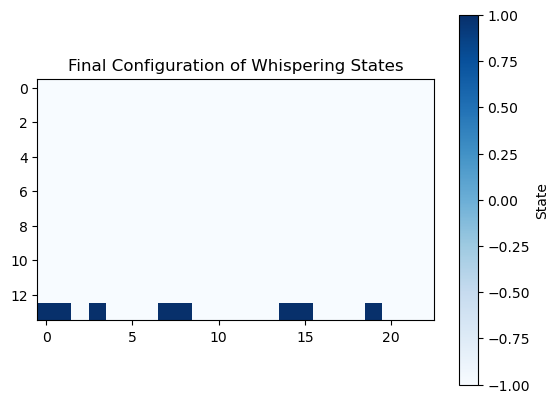

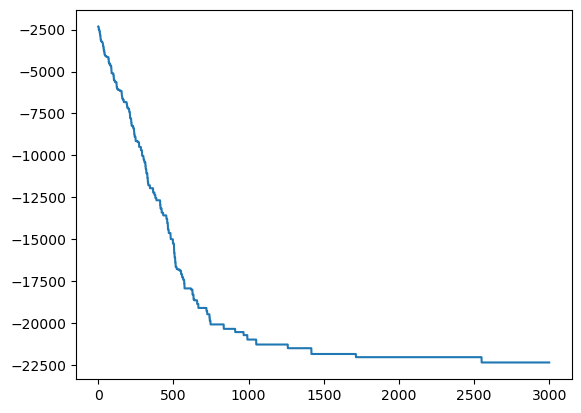

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 14  # Number of Rows
N = 23  # Number of Columns (4 + 2 + 11 + 2 + 4)
Nlist = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22]
J = 20.0  # Interaction energy
h = 0.0  # External field
T = 4 * np.fromfunction(lambda x, y: 1 + 0.1*x, (M, N))
steps = 3000  # Number of steps for the animation

# Initialize the lecture hall
# Random choice between -1 and 1
grid = np.random.choice([-1, 1], size=(M, N))
# Set the aisle and blanks at the back to -1(no talking can happen)
grid[:, 4:6] = -1
grid[:, 17:19] = -1
grid[11:14, 9:14] = -1
energy = []


# Function to compute the change in energy
def delta_E(grid, i, j):
    # Generate matrix of J by inverse square law
    Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
    Jmat[i, j] = 1
    Jmat = 1/Jmat
    Jmat[i, j] = 0
    # Calculate the sum of the neighboring spins
    Nmat = J * grid * Jmat
    neighbors = sum(sum(Nmat))
    # Compute the energy change
    dE = 2 * grid[i, j] * neighbors + 2 * h * grid[i, j]
    return dE

# Calculate energy
def calculate_energy(grid):
    E = 0
    for i in range(M):
        for j in range(N):
            Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
            Jmat[i, j] = 1
            Jmat = 1/Jmat
            Jmat[i, j] = 0
            Nmat = J * grid * Jmat
            neighbors = sum(sum(Nmat))
            E -= 0.5 * grid[i, j] * neighbors
            E -= h * grid[i, j]
    return E
            
# Glauber dynamics

# Generate grid
for step in range(steps):
    
    # Randomly select a site that is not blank
    i, j = 11, 9
    while i in [11, 12, 13] and j in [9, 10, 11, 12, 13]:
        i, j = np.random.randint(0, M-1), np.random.choice(np.array(Nlist))
    else:
        # Compute the change in energy
        dE = delta_E(grid, i, j)
        # Flip the state with the probability given by the Boltzmann factor
        if np.random.rand() < 1 / (1 + np.exp(dE / T[i, j])):
            grid[i, j] = -grid[i, j]
        energy.append(calculate_energy(grid))



# Plot the final configuration
plt.imshow(grid, cmap='Blues')
plt.title('Final Configuration of Whispering States')
plt.colorbar(label='State')
plt.show()
plt.plot(energy)


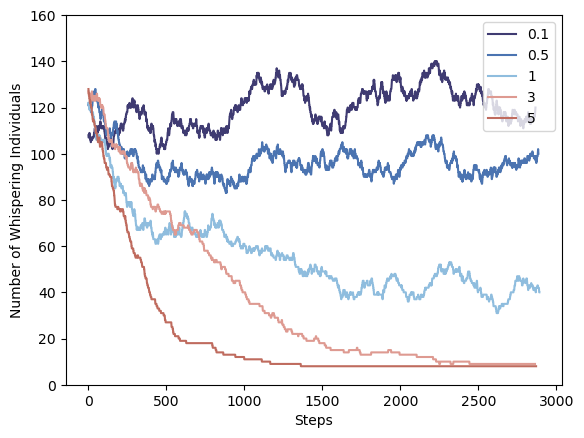

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 14  # Number of Rows
N = 23  # Number of Columns (4 + 2 + 11 + 2 + 4)
Nlist = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22]
J = 3.0  # Interaction energy
h = 0.0  # External field
T = 4 * np.fromfunction(lambda x, y: 1 + 0.1*x, (M, N))
steps = 3000  # Number of steps for the animation

RGBlist = np.array([[63, 59, 114], 
                        [75, 116, 178],
                        [144, 190, 223], 
                        [223, 155, 146], 
                        [192, 107, 94]])
Clist = RGBlist/256
iteration = 0

fig,(ax) = plt.subplots()  
ax.set_ylim([0, 160])
for J in [0.1, 0.5, 1, 3, 5]:
    # Initialize the lecture hall
    # Random choice between -1 and 1
    grid = np.random.choice([-1, 1], size=(M, N))
    # Set the aisle and blanks at the back to -1(no talking can happen)
    grid[:, 4:6] = -1
    grid[:, 17:19] = -1
    grid[11:14, 9:14] = -1
    energy = []

    nlist = []
    # Function to compute the change in energy
    def delta_E(grid, i, j):
        # Generate matrix of J by inverse square law
        Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
        Jmat[i, j] = 1
        Jmat = 1/Jmat
        Jmat[i, j] = 0
        # Calculate the sum of all weighted spins
        Nmat = J * grid * Jmat
        neighbors = sum(sum(Nmat))
        # Compute the energy change
        dE = 2 * grid[i, j] * neighbors + 2 * h * grid[i, j]

        # Count number of people whispering
        number = sum(sum((grid+1)/2))
        nlist.append(number)
        return dE

    # Calculate energy
    def calculate_energy(grid):
        E = 0
        for i in range(M):
            for j in range(N):
                Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
                Jmat[i, j] = 1
                Jmat = 1/Jmat
                Jmat[i, j] = 0
                Nmat = J * grid * Jmat
                neighbors = sum(sum(Nmat))
                E -= 0.5 * grid[i, j] * neighbors
                E -= h * grid[i, j]
        return E

    # Glauber dynamics
    # Generate grid
    for step in range(steps):

        # Randomly select a site that is not blank
        i, j = np.random.randint(0, M-1), np.random.choice(np.array(Nlist))
        if i in [11, 12, 13] and j in [9, 10, 11, 12, 13]:
            i, j = np.random.randint(0, M-1), np.random.choice(np.array(Nlist))
        else:
            # Compute the change in energy
            dE = delta_E(grid, i, j)
            # Flip the state with the probability given by the Boltzmann factor
            # if dE < 0 or np.random.rand() < np.exp(-dE / T[i, j]):
            if np.random.rand() < 1 / (1 + np.exp(dE / T[i, j])):
                grid[i, j] = -grid[i, j]
            # energy.append(calculate_energy(grid))
    plt.plot(nlist, label = J, color = tuple(Clist[iteration]))
    iteration += 1

plt.legend(loc = "upper right")
plt.xlabel("Steps")
plt.ylabel("Number of Whispering Individuals")
plt.show()


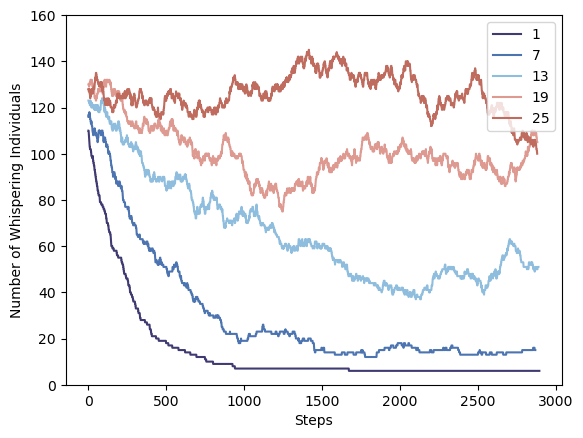

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 14  # Number of Rows
N = 23  # Number of Columns (4 + 2 + 11 + 2 + 4)
Nlist = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22]
J = 3.0  # Interaction energy
h = 0.0  # External field
T = 4 * np.fromfunction(lambda x, y: 1 + 0.1*x, (M, N))
steps = 3000  # Number of steps for the animation

RGBlist = np.array([[63, 59, 114], 
                    [75, 116, 178],
                    [144, 190, 223], 
                    [223, 155, 146], 
                    [192, 107, 94]])
Clist = RGBlist/256
iteration = 0

fig,(ax) = plt.subplots()  
ax.set_ylim([0, 160])
for T0 in range(1, 31, 6):
    T = T0 * np.fromfunction(lambda x, y: 1 + 0.1*x, (M, N))
    # Initialize the lecture hall
    # Random choice between -1 and 1
    grid = np.random.choice([-1, 1], size=(M, N))
    # Set the aisle and blanks at the back to -1(no talking can happen)
    grid[:, 4:6] = -1
    grid[:, 17:19] = -1
    grid[11:14, 9:14] = -1
    energy = []

    nlist = []
    # Function to compute the change in energy
    def delta_E(grid, i, j):
        # Generate matrix of J by inverse square law
        Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
        Jmat[i, j] = 1
        Jmat = 1/Jmat
        Jmat[i, j] = 0
        # Calculate the sum of all weighted spins
        Nmat = J * grid * Jmat
        neighbors = sum(sum(Nmat))
        # Compute the energy change
        dE = 2 * grid[i, j] * neighbors + 2 * h * grid[i, j]

        # Count number of people whispering
        number = sum(sum((grid+1)/2))
        nlist.append(number)
        return dE

    # Calculate energy
    def calculate_energy(grid):
        E = 0
        for i in range(M):
            for j in range(N):
                Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
                Jmat[i, j] = 1
                Jmat = 1/Jmat
                Jmat[i, j] = 0
                Nmat = J * grid * Jmat
                neighbors = sum(sum(Nmat))
                E -= 0.5 * grid[i, j] * neighbors
                E -= h * grid[i, j]
        return E

    # Glauber dynamics
    # Generate grid
    for step in range(steps):

        # Randomly select a site that is not blank
        i, j = np.random.randint(0, M-1), np.random.choice(np.array(Nlist))
        if i in [11, 12, 13] and j in [9, 10, 11, 12, 13]:
            i, j = np.random.randint(0, M-1), np.random.choice(np.array(Nlist))
        else:
            # Compute the change in energy
            dE = delta_E(grid, i, j)
            # Flip the state with the probability given by the Boltzmann factor
            # if dE < 0 or np.random.rand() < np.exp(-dE / T[i, j]):
            if np.random.rand() < 1 / (1 + np.exp(dE / T[i, j])):
                grid[i, j] = -grid[i, j]
            # energy.append(calculate_energy(grid))
    plt.plot(nlist, label = T0, color = tuple(Clist[iteration]))
    iteration += 1

plt.legend(loc = "upper right")
plt.xlabel("Steps")
plt.ylabel("Number of Whispering Individuals")
plt.show()


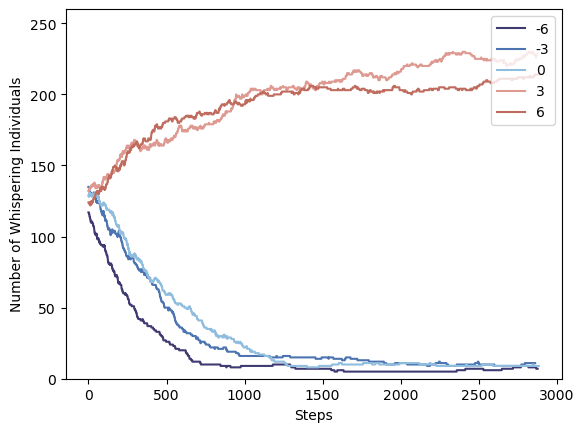

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 14  # Number of Rows
N = 23  # Number of Columns (4 + 2 + 11 + 2 + 4)
Nlist = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22]
J = 5.0  # Interaction energy
h = 0.0  # External field
T = 8 * np.fromfunction(lambda x, y: 1 + 0.1*x, (M, N))
steps = 3000  # Number of steps for the animation

RGBlist = np.array([[63, 59, 114], 
                    [75, 116, 178],
                    [144, 190, 223], 
                    [223, 155, 146], 
                    [192, 107, 94]])
Clist = RGBlist/256

fig,(ax) = plt.subplots()  
ax.set_ylim([0, 260])
iteration = 0
for h in range(-6, 7, 3):
    # Initialize the lecture hall
    # Random choice between -1 and 1
    grid = np.random.choice([-1, 1], size=(M, N))
    # Set the aisle and blanks at the back to -1(no talking can happen)
    grid[:, 4:6] = -1
    grid[:, 17:19] = -1
    grid[11:14, 9:14] = -1
    energy = []

    nlist = []
    # Function to compute the change in energy
    def delta_E(grid, i, j):
        # Generate matrix of J by inverse square law
        Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
        Jmat[i, j] = 1
        Jmat = 1/Jmat
        Jmat[i, j] = 0
        # Calculate the sum of all weighted spins
        Nmat = J * grid * Jmat
        neighbors = sum(sum(Nmat))
        # Compute the energy change
        dE = 2 * grid[i, j] * neighbors + 2 * h * grid[i, j]

        # Count number of people whispering
        number = sum(sum((grid+1)/2))
        nlist.append(number)
        return dE

    # Calculate energy
    def calculate_energy(grid):
        E = 0
        for i in range(M):
            for j in range(N):
                Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
                Jmat[i, j] = 1
                Jmat = 1/Jmat
                Jmat[i, j] = 0
                Nmat = J * grid * Jmat
                neighbors = sum(sum(Nmat))
                E -= 0.5 * grid[i, j] * neighbors
                E -= h * grid[i, j]
        return E

    # Glauber dynamics
    # Generate grid
    for step in range(steps):

        # Randomly select a site that is not blank
        i, j = np.random.randint(0, M-1), np.random.choice(np.array(Nlist))
        if i in [11, 12, 13] and j in [9, 10, 11, 12, 13]:
            i, j = np.random.randint(0, M-1), np.random.choice(np.array(Nlist))
        else:
            # Compute the change in energy
            dE = delta_E(grid, i, j)
            # Flip the state with the probability given by the Boltzmann factor
            # if dE < 0 or np.random.rand() < np.exp(-dE / T[i, j]):
            if np.random.rand() < 1 / (1 + np.exp(dE / T[i, j])):
                grid[i, j] = -grid[i, j]
            # energy.append(calculate_energy(grid))
    plt.plot(nlist, label = h, color = tuple(Clist[iteration]))
    iteration += 1

plt.legend(loc = "upper right")
plt.xlabel("Steps")
plt.ylabel("Number of Whispering Individuals")
plt.show()


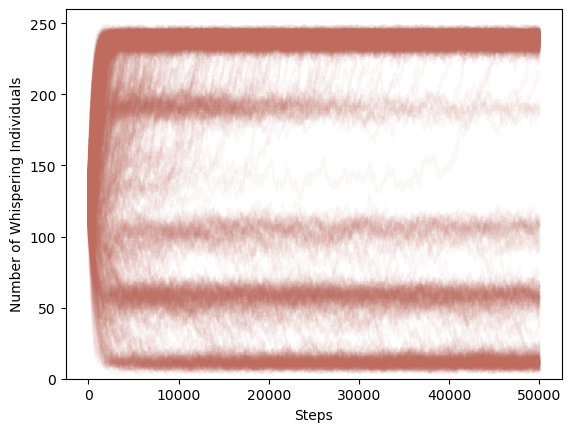

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig,(ax) = plt.subplots()  
ax.set_ylim([0, 260])
for cnt in range(1000):
    # Parameters
    M = 14  # Number of Rows
    N = 23  # Number of Columns (4 + 2 + 11 + 2 + 4)
    Nlist = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22]
    J = 5.0  # Interaction energy
    h = 6.0  # External field
    T = 8 * np.fromfunction(lambda x, y: 1 + 0.1*x, (M, N))
    steps = 50000  # Number of steps for the animation

    RGBlist = np.array([[63, 59, 114], 
                        [75, 116, 178],
                        [144, 190, 223], 
                        [223, 155, 146], 
                        [192, 107, 94]])
    Clist = RGBlist/256

    # Initialize the lecture hall
    # Random choice between -1 and 1
    grid = np.random.choice([-1, 1], size=(M, N))
    # Set the aisle and blanks at the back to -1(no talking can happen)
    grid[:, 4:6] = -1
    grid[:, 17:19] = -1
    grid[11:14, 9:14] = -1
    nlist = []
    
    # Function to compute the change in energy
    def delta_E(grid, i, j):
        # Generate matrix of J by inverse square law
        Jmat = np.fromfunction(lambda x, y: (x-i)**2 + (95/50 * (y-j))**2, (M, N))
        Jmat[i, j] = 1
        Jmat = 1/Jmat
        Jmat[i, j] = 0
        # Calculate the sum of all weighted spins
        Nmat = J * grid * Jmat
        neighbors = sum(sum(Nmat))
        # Compute the energy change
        dE = 2 * grid[i, j] * neighbors + 2 * h * grid[i, j]

        # Count number of people whispering
        number = sum(sum((grid+1)/2))
        nlist.append(number)
        return dE

    # Glauber dynamics
    for step in range(steps):
        # Randomly select a site that is not blank
        i, j = 11, 9
        while i in [11, 12, 13] and j in [9, 10, 11, 12, 13]:
            i, j = np.random.randint(0, M-1), np.random.choice(np.array(Nlist))
        else:
            # Compute the change in energy
            dE = delta_E(grid, i, j)
            # Flip the state with the probability given by the Boltzmann factor
            if np.random.rand() < 1 / (1 + np.exp(dE / T[i, j])):
                grid[i, j] = -grid[i, j]
                
    plt.plot(nlist, label = h, color = tuple(Clist[-1]), alpha=0.05)

plt.xlabel("Steps")
plt.ylabel("Number of Whispering Individuals")

plt.show()
